**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5044 - Operaciones de aprendizaje automático (MLOps)**

**Tecnológico de Monterrey**

Dr. Gerardo Rodríguez Hernández

Prof. José Ángel Martínez Navarro

**Semana 5**
Fase 1 | Avance de Proyecto

**Equipo 18**
- Ali Mateo Campos Martínez      A01796071
- Mario Fonseca Martínez         A01795228
- Miguel Ángel Hernández Núñez   A01795751
- Jonatan Israel Meza Mendoza    A01275322
- Eder Mauricio Castillo Galindo A01795453

---

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Configuración gráfica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Cargar dataset modificado
df = pd.read_csv("../data/turkish_music_emotion_modified.csv")

# Revisar primeras filas
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0.0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1.0,0.413,28.105999999999998,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1.0,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


# **Parte 1**. Análisis descriptivo (univariante)

In [5]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [49]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 38
Columnas numéricas: 14


In [7]:
# Porcentaje (%) de valores faltantes por columna
df.isna().sum().sort_values(ascending=False).mul(100).div(len(df))

mixed_type_col                                    9.313725
_MFCC_Mean_11                                     2.696078
_MFCC_Mean_3                                      2.696078
_MFCC_Mean_5                                      1.960784
_Spectralcentroid_Mean                            1.960784
_MFCC_Mean_12                                     1.960784
_HarmonicChangeDetectionFunction_Mean             1.960784
_Pulseclarity_Mean                                1.715686
_RMSenergy_Mean                                   1.715686
_Tempo_Mean                                       1.715686
_HarmonicChangeDetectionFunction_Slope            1.715686
_MFCC_Mean_4                                      1.470588
_MFCC_Mean_1                                      1.470588
_MFCC_Mean_10                                     1.470588
_Spectralskewness_Mean                            1.470588
_AttackTime_Slope                                 1.470588
_Chromagram_Mean_7                                1.4705

## Análisis de variables numéricas

In [8]:
# Estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Lowenergy_Mean,404.0,4.241829,50.714118,0.302,0.52300,0.5535,0.58500,805.528
_Fluctuation_Mean,405.0,9.711723,32.204572,3.987,5.85200,6.7450,7.83800,483.105
_MFCC_Mean_1,402.0,6.270055,37.120651,0.423,1.95875,2.4200,2.90000,565.490
_MFCC_Mean_2,403.0,7.599908,77.807229,-43.608,-0.26700,0.0650,0.41350,946.483
_MFCC_Mean_13,406.0,1.004042,19.712898,-0.620,-0.04400,0.0390,0.10500,397.220
_AttackTime_Slope,402.0,4.055219,49.192974,-0.465,-0.09300,0.0100,0.08975,732.036
_Eventdensity_Mean,405.0,8.865998,67.375263,0.234,1.73700,2.7730,3.74200,998.241
_Pulseclarity_Mean,401.0,4.355584,49.896492,0.011,0.13000,0.2180,0.33100,794.363
_Spectralcentroid_Mean,400.0,4625.624853,21765.211883,606.524,1983.39500,2547.6780,3179.98675,318051.072
_Chromagram_Mean_3,405.0,2.682472,45.699208,0.000,0.08300,0.2990,0.59500,920.000


In [9]:
# Forma (asimetría)
df.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

_MFCC_Mean_13                                  20.147970
_Chromagram_Mean_3                             20.118656
_Chromagram_Mean_10                            20.045608
_Lowenergy_Mean                                14.444717
_Chromagram_Mean_9                             14.111677
_Pulseclarity_Mean                             13.526342
_Fluctuation_Mean                              13.223509
_AttackTime_Slope                              12.887338
_Eventdensity_Mean                             12.461290
_MFCC_Mean_1                                   12.268594
_Spectralcentroid_Mean                         11.943330
_HarmonicChangeDetectionFunction_PeriodFreq    11.703957
_MFCC_Mean_2                                   10.380621
_Chromagram_Mean_6                              1.134205
dtype: float64

In [10]:
# Forma (curtosis)
df.kurt(numeric_only=True).sort_values(ascending=False)

_MFCC_Mean_13                                  405.960372
_Chromagram_Mean_3                             404.839071
_Chromagram_Mean_10                            402.209418
_Lowenergy_Mean                                211.045891
_Chromagram_Mean_9                             198.469578
_Pulseclarity_Mean                             192.842101
_Fluctuation_Mean                              180.148383
_AttackTime_Slope                              171.826077
_Eventdensity_Mean                             164.068311
_MFCC_Mean_1                                   163.872334
_Spectralcentroid_Mean                         150.161041
_HarmonicChangeDetectionFunction_PeriodFreq    143.717906
_MFCC_Mean_2                                   109.020740
_Chromagram_Mean_6                               0.253010
dtype: float64

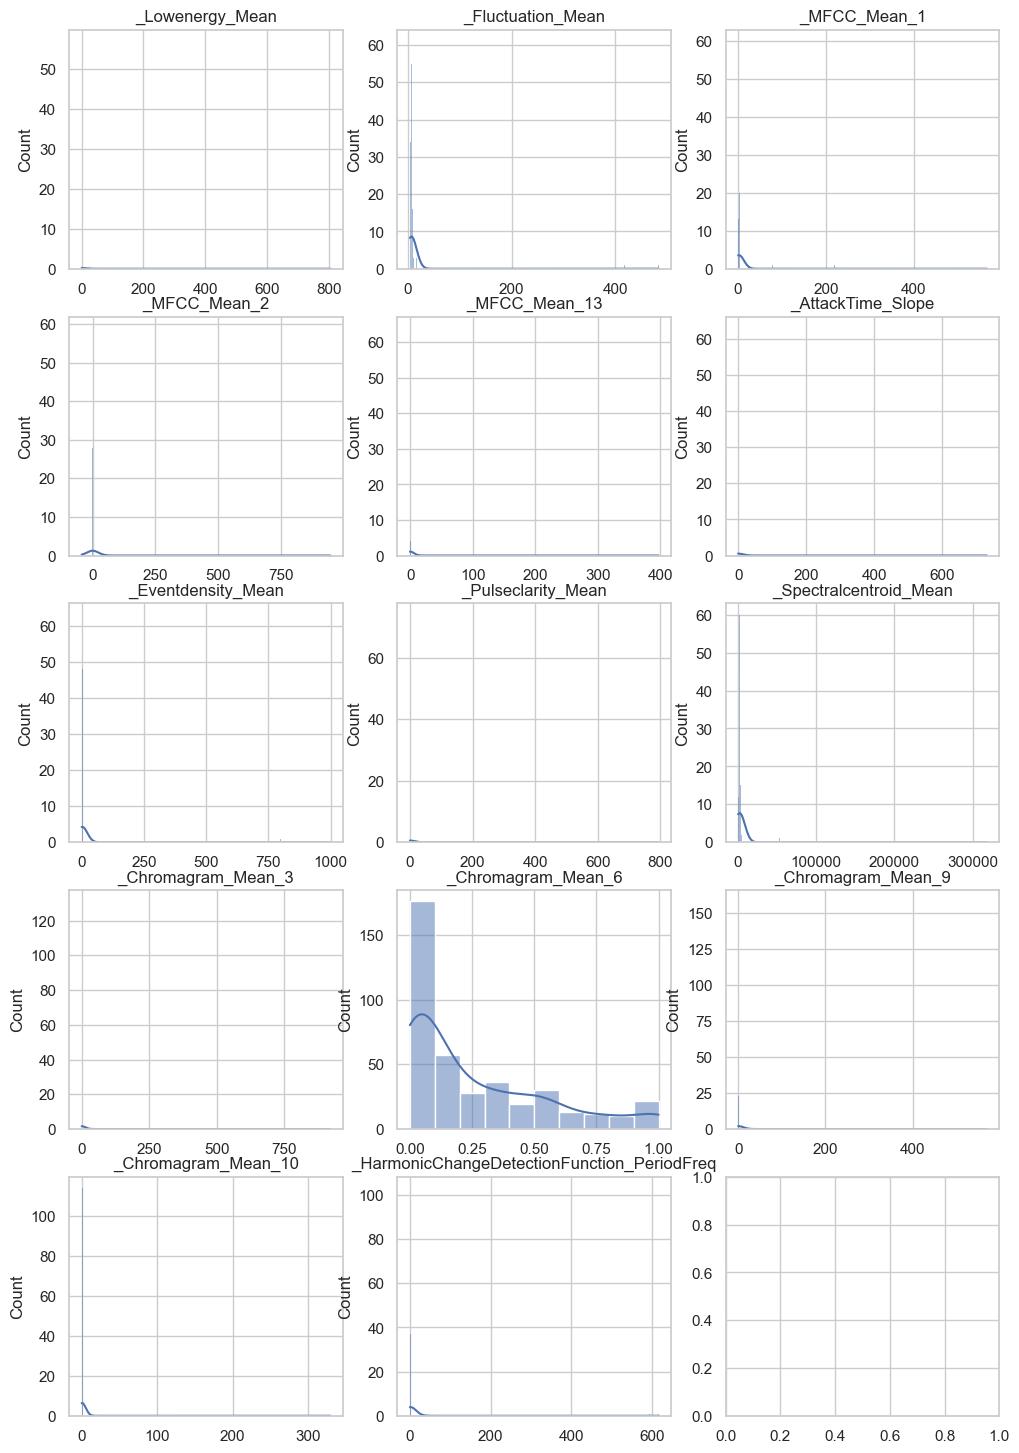

In [11]:
# Gráficos de histogramas para determinar la distribución de los valores representados en cada variable
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14,18))
axes = axes.ravel()

numeric_cols = num_numeric.columns.tolist()

for col, ax in zip(numeric_cols, axes):
  sns.histplot(x=df[col], kde=True, ax=ax)
  ax.set(title=f'{col}', xlabel=None)

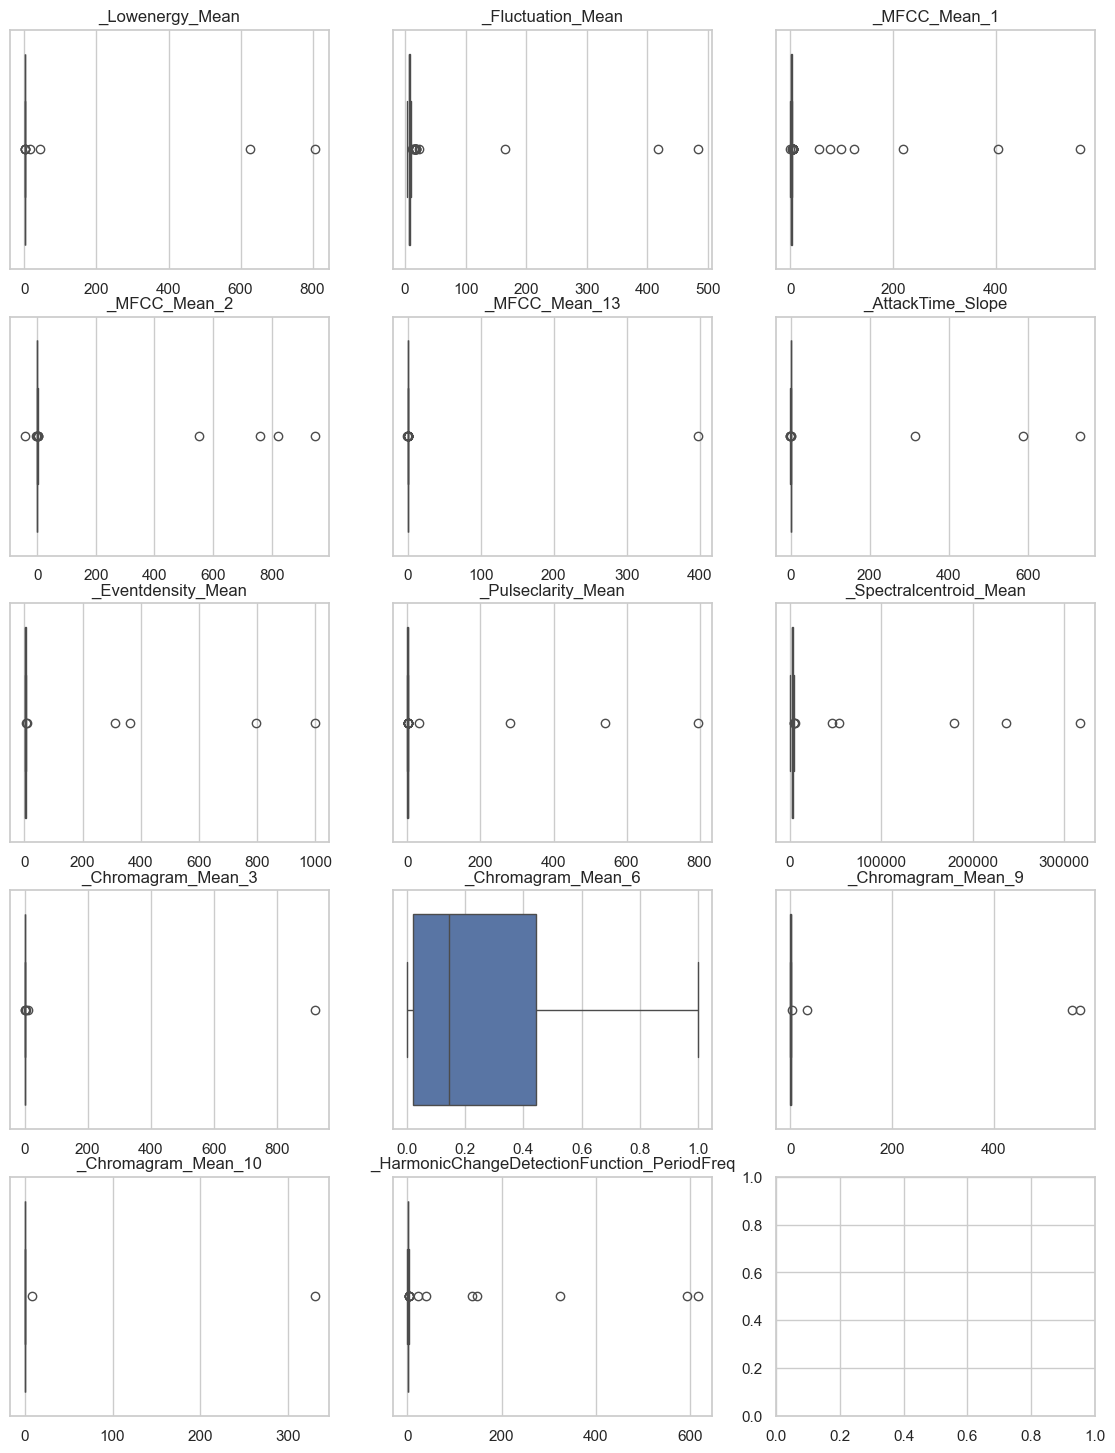

In [26]:
# Gráficos de Box plot para mostrar la distribución de los datos a través de sus cuartiles
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14,18))
axes = axes.ravel()

for col, ax in zip(numeric_cols, axes):
  sns.boxplot(x=df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

## Análisis de variables categóricas

In [37]:
# Descripción estadística
df.describe(include='O').T

,count,unique,top,freq
Class,403,8,relax,100
_RMSenergy_Mean,401,211,0.06,6
_Tempo_Mean,401,384,150.255,3
_MFCC_Mean_3,397,320,0.259,5
_MFCC_Mean_4,402,328,0.123,5
_MFCC_Mean_5,400,301,0.124,4
_MFCC_Mean_6,404,305,0.138,5
_MFCC_Mean_7,405,310,0.073,5
_MFCC_Mean_8,405,285,0.037,6
_MFCC_Mean_9,405,286,-0.018,5


-> No sólo el nombre de las columnas sino adicionalmente la moda de la tabla anterior sugiere que son realmente valores numéricos. mixed_type_col y Class son las únicas que sugieren ser tipo string. Más adelante revisaremos el detalle.

In [74]:
# Recuentos únicos (número de ocurrencias para cada valor único)
cat_cols = ["Class", "mixed_type_col"]

for col in cat_cols:
    print('---------------------------------------------')
    print(f'Número de ocurrencias para cada valor:')
    print(df[col].value_counts())

---------------------------------------------
Número de ocurrencias para cada valor:
Class
relax      100
sad         99
happy       98
angry       93
 HAPPY       4
 ANGRY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64
---------------------------------------------
Número de ocurrencias para cada valor:
mixed_type_col
bad        42
unknown    39
987         3
979         2
259         2
           ..
376         1
206         1
373         1
448         1
136         1
Name: count, Length: 257, dtype: int64


* mixed_type_col también parece ser un numérica, sólo que se requiere cambiar "bad" y "unknown" por nulos inicialmente.
* La columna "Class" sólo requiere remover espacios al inicio y final de cada cadena y luego estandarizar así:
    * relax = RELAX
    * sad = SAD
    * happy = HAPPY
    * angry = ANGRY
* De esa manera la única categórica sería nuestra variable a predecir "Class".

In [ ]:
# Gráficos de barras por variable para representar la frecuencia de cada categoría
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.tight_layout(pad=8.0)
axes = axes.ravel()

cat_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()

for col, ax in zip(cat_cols, axes):
  sns.countplot(x=df["Class"], ax=ax, palette='pastel')
  ax.set(title=f'{"Class"}', xlabel=None)